In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 600.2 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 3.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [51]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns


import yaml
from PIL import Image, ImageDraw, ImageFont


sns.set_style('darkgrid')

%matplotlib inline

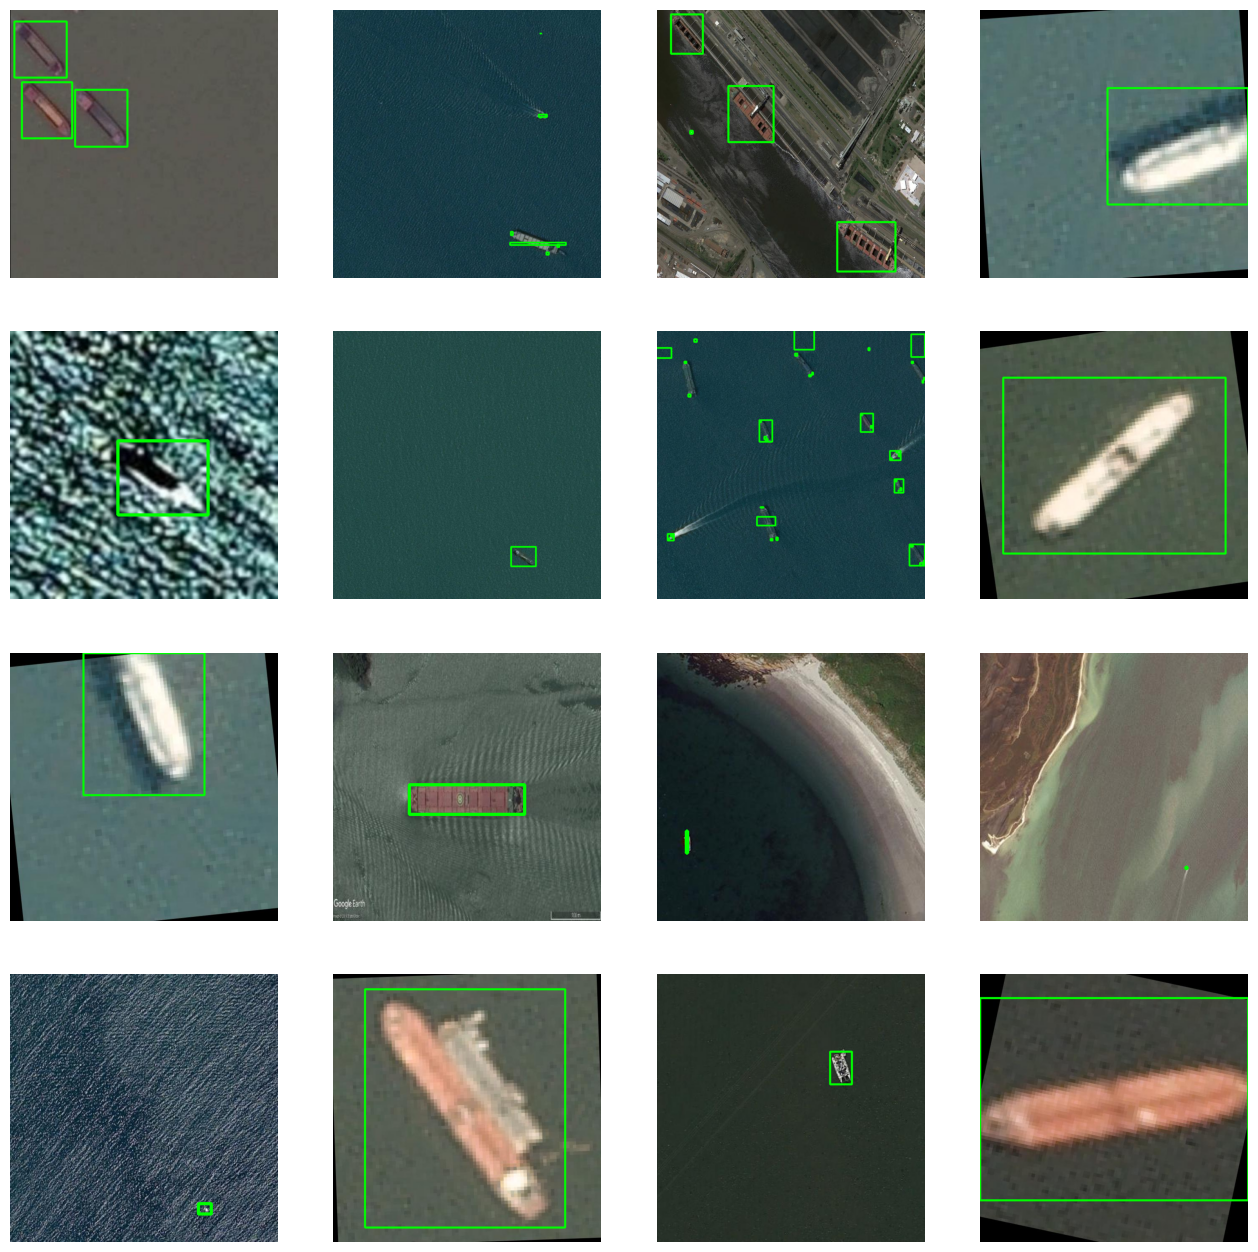

In [6]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [8]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x768 and 3 channels.


In [6]:
# with open('/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml', 'r') as file:
#     data_config = yaml.safe_load(file)

In [12]:
# Loading a pretrained model
model = YOLO('yolov10n.pt')

# Training the model
model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
            epochs = 15,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4,
            device=0,
            amp=True)

Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=15, time=None, patience=100, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

wandb: Currently logged in as: anika-tahsin5 (anika-tahsin8-5-). Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:20<00:00, 478.91it/s]

train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


train: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:04<00:00, 462.21it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.52G       3.83      7.948      3.313         29        768: 100%|██████████| 1212/1212 [03:42<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.01it/s]


                   all       2165       3720      0.254      0.252       0.17     0.0709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.28G      3.897      4.639      3.333         90        768: 100%|██████████| 1212/1212 [03:28<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.07it/s]


                   all       2165       3720       0.32       0.23      0.195     0.0859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.07G      3.832      4.334      3.274         18        768: 100%|██████████| 1212/1212 [03:23<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.03it/s]

                   all       2165       3720      0.386      0.269      0.244      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         3G      3.722      4.087      3.221         29        768: 100%|██████████| 1212/1212 [03:21<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.09it/s]

                   all       2165       3720      0.371      0.283      0.245      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.51G      3.611      3.841      3.117         21        768: 100%|██████████| 1212/1212 [03:21<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.00it/s]

                   all       2165       3720      0.435      0.313      0.299      0.154


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.01G      3.505      3.517      3.076          8        768: 100%|██████████| 1212/1212 [03:19<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.01it/s]


                   all       2165       3720      0.426      0.313      0.305      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.01G      3.372       3.34      2.999         26        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.03it/s]

                   all       2165       3720      0.455       0.36      0.335      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.37G      3.318      3.183       2.93          7        768: 100%|██████████| 1212/1212 [03:18<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.01it/s]

                   all       2165       3720      0.484      0.368      0.363      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.99G      3.243      3.095      2.883          7        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  6.96it/s]

                   all       2165       3720      0.492      0.361      0.372      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.99G      3.179      2.934      2.824         13        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  6.96it/s]

                   all       2165       3720      0.485      0.369      0.379      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.14G      3.131      2.864      2.791         17        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  6.99it/s]

                   all       2165       3720      0.482      0.384      0.388      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.31G      3.076      2.752      2.759          6        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  6.96it/s]

                   all       2165       3720      0.513      0.394      0.402      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.03G      3.009      2.669      2.709          9        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.01it/s]

                   all       2165       3720      0.512      0.393      0.406      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.99G      2.957      2.579      2.664         21        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  7.02it/s]

                   all       2165       3720      0.526      0.396      0.415      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.48G      2.907       2.53      2.613          8        768: 100%|██████████| 1212/1212 [03:17<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:19<00:00,  6.96it/s]

                   all       2165       3720      0.536      0.397      0.421      0.251



15 epochs completed in 0.943 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.8MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:18<00:00,  7.35it/s]


                   all       2165       3720      0.536      0.397      0.421       0.25
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cfc315b2920>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# t4 config in code to turn on
# gradcam diye visualize for one image. learn how to gradcam

In [ ]:
# import os

# # List contents of the directory where the file should be
# directory = '/kaggle/working/train/weights/'
# files = os.listdir(directory)
# print(files)

In [15]:
# model.save('/kaggle/working/runs/detect/train/weights/best.pt') # Save the model in TorchScript format
model.save('/kaggle/working/best.pt') # Save the model in TorchScript format

In [16]:
# Loading the best performing model
model = YOLO('/kaggle/working/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(data='/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml', conf=0.25, split='test')

Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:11<00:00, 138.08it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:15<00:00,  6.57it/s]


                   all       1573       2872      0.782      0.231      0.518      0.365
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val


# Evalutation

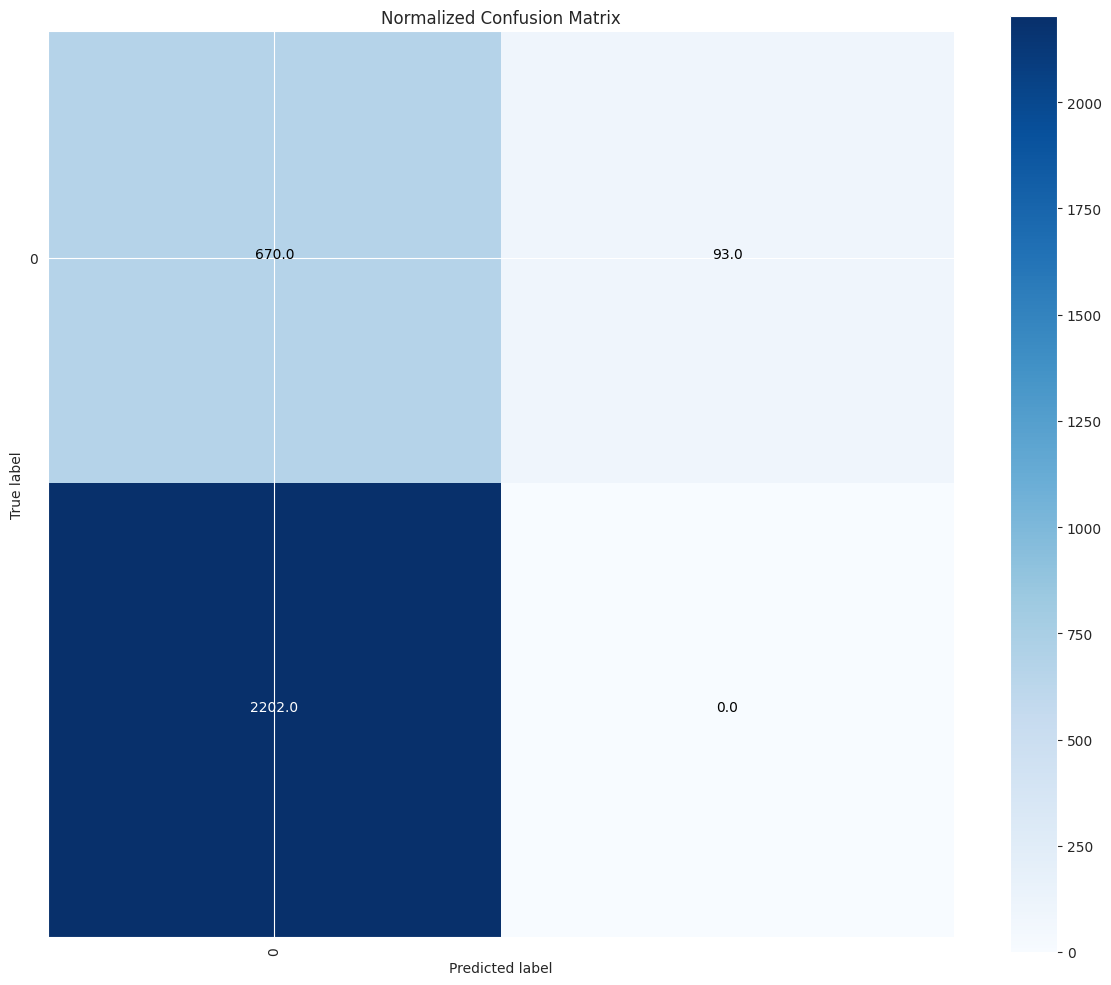

In [17]:
%matplotlib inline

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix

# # Normalize the confusion matrix
# confusion_matrix_normalized = confusion_matrix.normalize()

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(confusion_matrix.matrix, cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(model.names))
plt.xticks(tick_marks, model.names, rotation=90)
plt.yticks(tick_marks, model.names)

fmt = '.1f'
thresh = confusion_matrix.matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.matrix.shape):
    plt.text(j, i, format(confusion_matrix.matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion_matrix.matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Segment Detection Prediction

In [43]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 640x640 2 ships, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 11.6ms
Speed: 2.5ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 11.6ms
Speed: 2.4ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 ships, 10.9ms
Speed: 2.2ms preprocess, 10.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 64

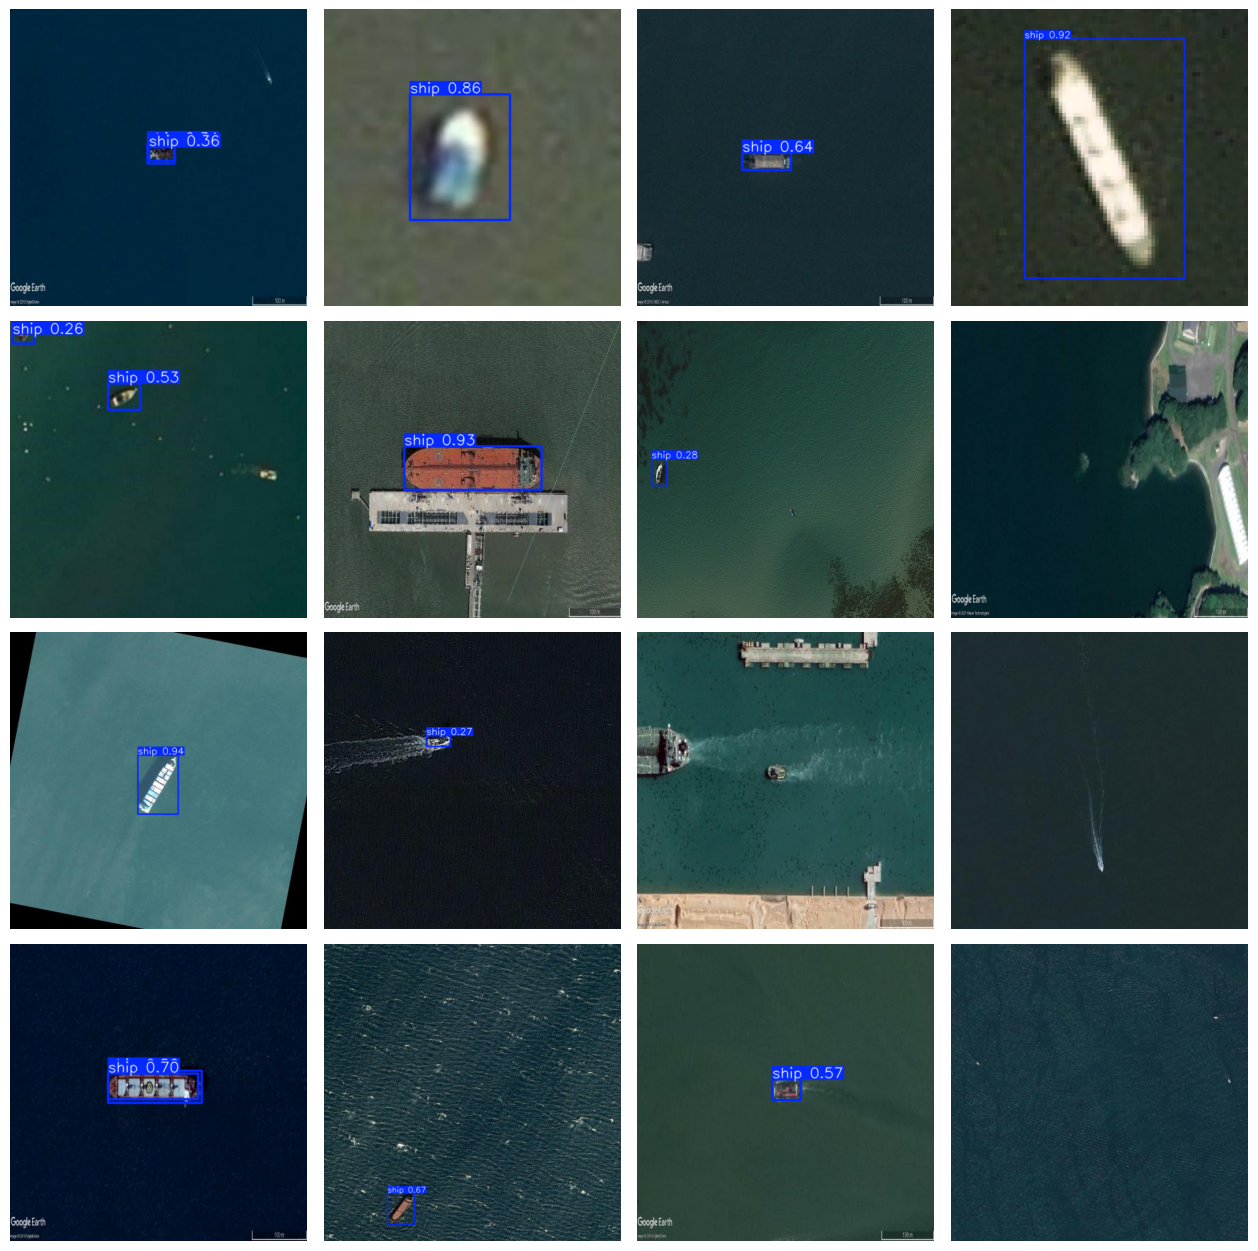

In [44]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


0: 640x640 1 ship, 12.2ms
Speed: 3.6ms preprocess, 12.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 11.6ms
Speed: 3.6ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


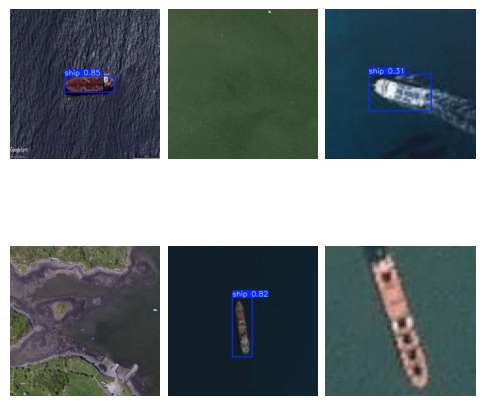

In [50]:
# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 6 random images from the list
selected_images = random.sample(image_files, 6)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)